<a href="https://colab.research.google.com/github/Amine-Lamarr/GB-Classifier/blob/master/tensorkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


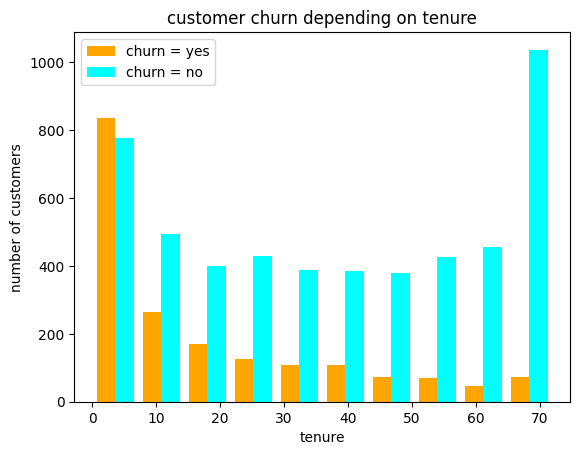

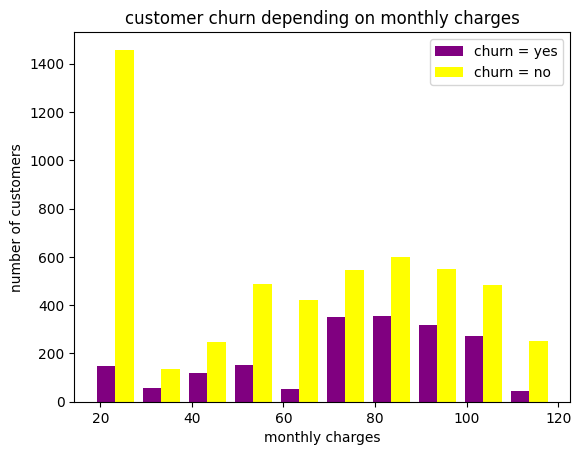

In [26]:
data = pd.read_csv(r"/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.shape
data.columns
target = "Churn"

tenure_no = data[data[target] == 'No'].tenure
tenure_yes = data[data[target] == 'Yes'].tenure

plt.hist([tenure_yes , tenure_no] , color = ['orange', 'cyan'] ,  label = ["churn = yes" , "churn = no"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("number of customers")
plt.title("customer churn depending on tenure")
plt.show()

mchurn_yes = data[data[target] == 'Yes'].MonthlyCharges
mchurn_no = data[data[target] == 'No'].MonthlyCharges

plt.hist([mchurn_yes , mchurn_no] , color = ['purple', 'yellow'] ,  label = ["churn = yes" , "churn = no"])
plt.legend()
plt.xlabel("monthly charges")
plt.ylabel("number of customers")
plt.title("customer churn depending on monthly charges")
plt.show()

In [27]:
data.head()
for col in data:
    print(f"{col} :{data[col].unique()}")

data['MultipleLines'].replace('No phone service' , 'No' , inplace=True)
data = data.drop('customerID' , axis='columns')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'] , errors='coerce')
features = ["OnlineSecurity" ,"OnlineBackup" ,"DeviceProtection" , "TechSupport" ,"StreamingTV" ,"StreamingMovies"]
yes_no_feats = ['Partner' , 'Dependents' ,'PhoneService' ,'OnlineSecurity' ,'TechSupport' , 'DeviceProtection' , 'MultipleLines' , 'OnlineBackup' ,'StreamingMovies', 'Churn' , 'PaperlessBilling'  , 'StreamingTV' , 'gender' ]
feats_to_scale = ['tenure' ,'MonthlyCharges' , 'TotalCharges']
# oops i forgot something :)
data = data.dropna(subset=['TotalCharges'])

def replace(labels):
    for col in labels :
        data[col] = data[col].replace("No internet service" , 'No')

def encoding(feat):
    encoder = LabelEncoder()
    for col in feat:
        data[col] = encoder.fit_transform(data[col])

replace(features)
encoding(yes_no_feats)

data = pd.get_dummies(data , columns=["InternetService", "Contract" , "PaymentMethod"] , dtype=int)
scaler = MinMaxScaler()
data[feats_to_scale] = scaler.fit_transform(data[feats_to_scale])
x = data.drop(target , axis='columns')
y = data[target]


customerID :['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)

<ipython-input-27-f7993af97bee>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MultipleLines'].replace('No phone service' , 'No' , inplace=True)


## ***flattening the data***

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.2 , random_state=23)
model = keras.Sequential([
    keras.layers.Dense(128 , activation='relu') ,
    keras.layers.Dense(32 , activation='relu'),
    keras.layers.Dense(1 , activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam' ,
    loss = 'binary_crossentropy'  ,
    metrics = ['accuracy']
)
model.fit(x_train , y_train , epochs = 150 , validation_split = 0.2)
loss , accuracy = model.evaluate(x_test , y_test)
predictions = model.predict(x_test)

for i, pred in enumerate(predictions[:10]):
    predicted_label = 1 if pred > 0.5 else 0
    print(f"Sample {i+1} | Prediction: {predicted_label} | Actual: {y_test.iloc[i]}")

Epoch 1/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7566 - loss: 0.5069 - val_accuracy: 0.8080 - val_loss: 0.4334
Epoch 2/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.4232 - val_accuracy: 0.8036 - val_loss: 0.4325
Epoch 3/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8019 - loss: 0.4256 - val_accuracy: 0.8098 - val_loss: 0.4264
Epoch 4/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8099 - loss: 0.4127 - val_accuracy: 0.8062 - val_loss: 0.4302
Epoch 5/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8071 - loss: 0.4008 - val_accuracy: 0.8098 - val_loss: 0.4257
Epoch 6/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8130 - loss: 0.3982 - val_accuracy: 0.8116 - val_loss: 0.4262
Epoch 7/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8152 - loss: 0.3960 - val_accuracy: 0.8071 - val_loss: 0.4333
Epoch 8/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8182 - loss: 0.3890 - val_acc

# **results**

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


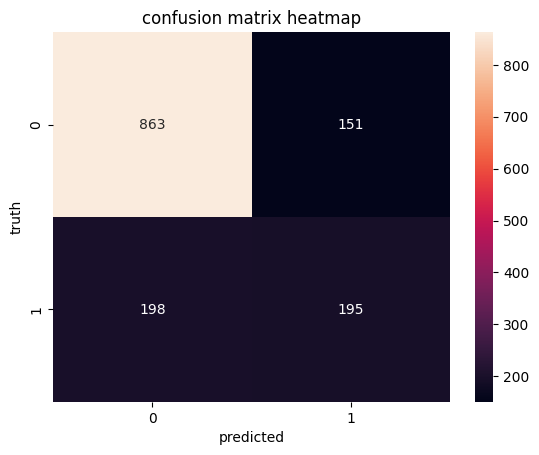

In [36]:
ypre = [1 if i > 0.5  else 0 for i in predictions]
cm = confusion_matrix(y_test , ypre)
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.title("confusion matrix heatmap")
plt.show()